In [74]:
import numpy as np
import math
import matplotlib.pyplot as plt


In [75]:
# Parameters

l = 200 #Size of the grid
A = 0.05  #Maximum cell number
σ1 = 15 #Width of the tumor 
σ2 = 25 #Width of the tumor 
σ3 = 12 #Width of the tumor 
delta_t = 0.1
delta_x = 1
D = 0.05 
Alpha_zero = 1
N_Max  = 1

In [76]:
#  l x l matrix initialized to zeros
matrix = np.zeros((l, l))


In [77]:
# Fill the matrix with the Gaussian distribution
for i in range(l):
    for j in range(l): 
        exponent1 = - ((i - l/2)**2 + (j - l/2+10)**2) / (2 * σ1**2)
        exponent2 = - ((i - l/2  )**2 + (j - 3* l/4 + 30)**2) / (2 * σ2**2)
        exponent3 = - ((i - 2* l/5)**2 + (j -  3* l/5+10)**2) / (2 * σ3**2)
        matrix[i, j] = A*np.exp(exponent1) + A*np.exp(exponent2) + A*np.exp(exponent3)


        #if(A*np.exp(exponent1) + A*np.exp(exponent2) + A*np.exp(exponent3)) >= 0.1:
           # matrix[i, j] = 0.1
       # else:
            #matrix[i, j] = A*np.exp(exponent1) + A*np.exp(exponent2) + A*np.exp(exponent3)
                
        

0.09735307702363416


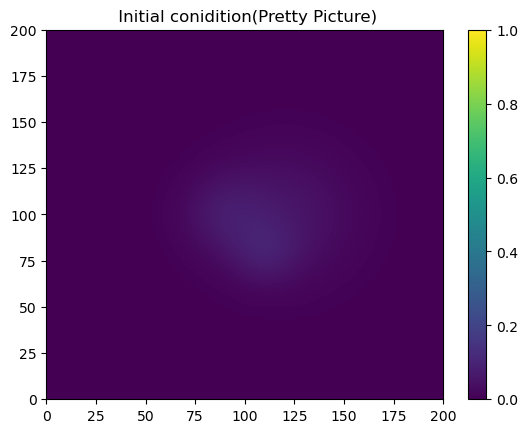

In [78]:
# Display the matrix using plt.pcolor
plt.pcolor(matrix, cmap='viridis')
plt.clim(0,N_Max)
print(matrix.max())
plt.colorbar()# Adds a colorbar to the plot
plt.title(' Initial conidition(Pretty Picture)')
plt.show()
maximum_value = N_Max

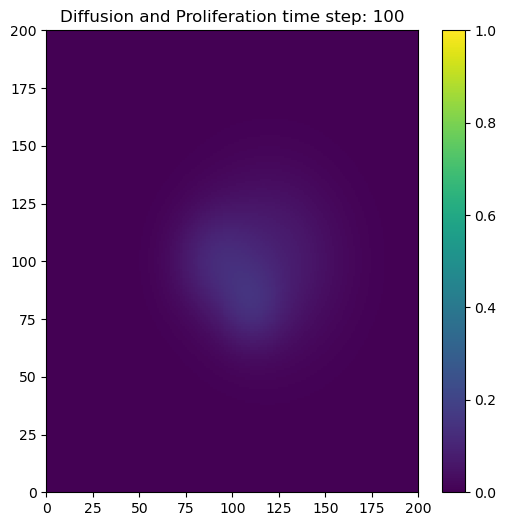

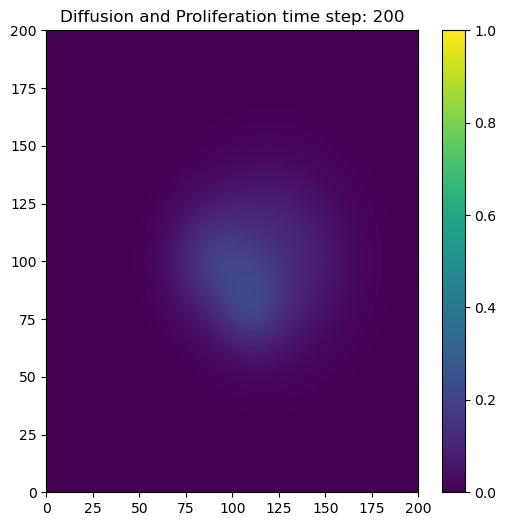

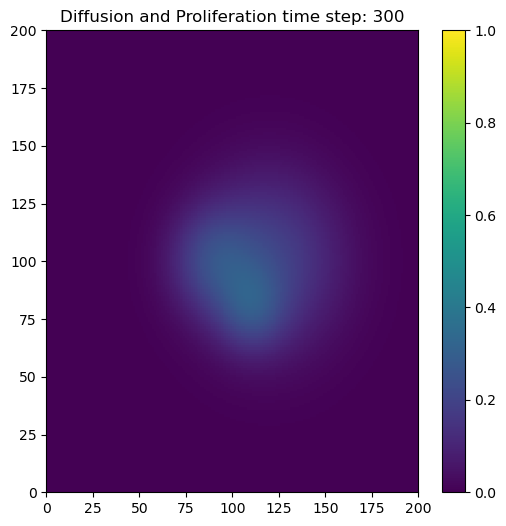

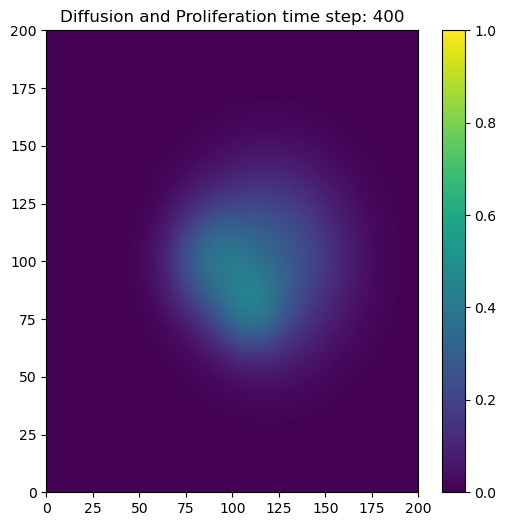

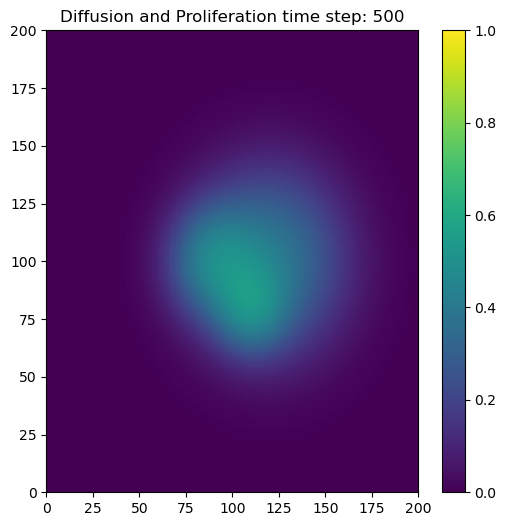

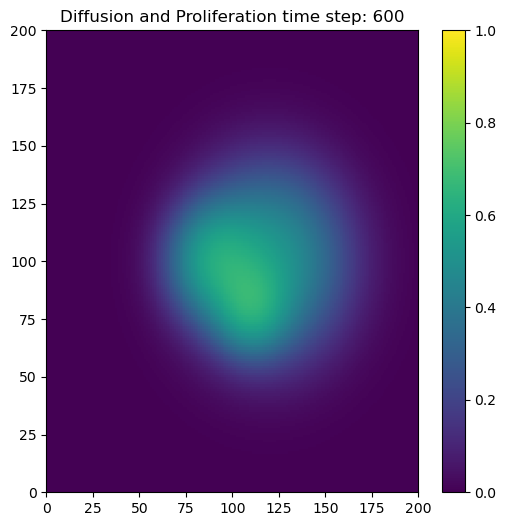

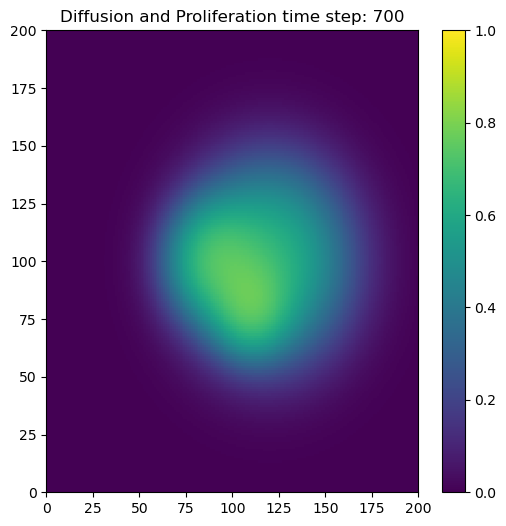

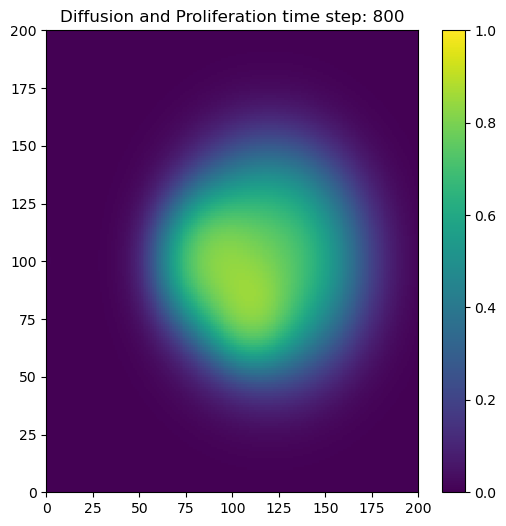

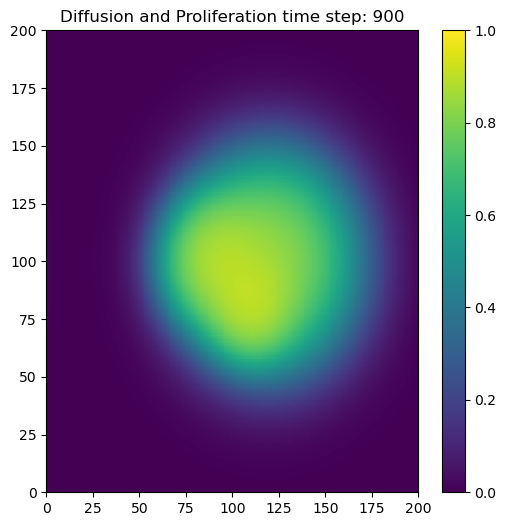

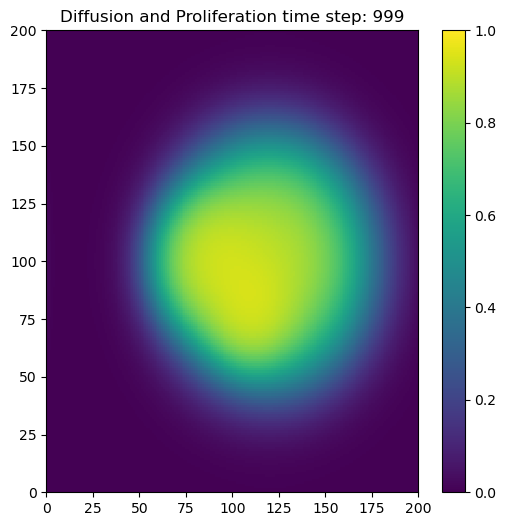

In [79]:
matrix_next = np.zeros((l,l))
num_step = 1000
# Time steps at which to save and plot the result
save_steps = [100, 200, 300, 400, 500, 600,700,800,900,999]
# Simulation loop over time
for time in range(1, num_step + 1):
    # Loop over each point in the grid
    for i in range(l):
        for j in range(l):
            # Define i1, i2, j1, j2 for the neighboring points with periodic boundary conditions
            i1 = (i + 1) % l
            i2 = (i + l - 1) % l
            j1 = (j + 1) % l
            j2 = (j + l - 1) % l
            # Apply the diffusion equation to compute matrix_next(i, j)

            matrix_next[i, j] = matrix[i, j] + delta_t * ((D /delta_x**2) * (matrix[i1, j] + matrix[i2, j] + matrix[i, j1] + matrix[i, j2] - 4 * matrix[i, j] + (Alpha_zero * matrix[i,j]) * (1 - matrix[i,j] / N_Max)))
    matrix = np.copy(matrix_next)
      
    # Check if the current time step is one of the save steps
    if time in save_steps:
        plt.figure(figsize=(6, 6))
        plt.pcolor(matrix, cmap='viridis')
        plt.colorbar()
        plt.clim(0,N_Max)
        plt.title(f'Diffusion and Proliferation time step: {time}')
        
        # Save the figure as a PNG file
        plt.savefig(f'matrix_step_{time}.png')